# Vector Space Model Implementation
## Information Retrieval System

This notebook implements the Vector Space Model (VSM) using TF-IDF (Term Frequency-Inverse Document Frequency) weighting scheme.

**Objective:**
- Implement VSM with a small document collection (5 documents)
- Query: "information retrieval system"
- Rank documents by relevance using cosine similarity
- Analyze why certain documents score higher

## Step 1: Document Collection and Preprocessing

We create a small collection of 5 documents related to information systems.

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

documents = [
    "Information retrieval is the process of obtaining information from large repositories.",
    "A retrieval system helps users find relevant information efficiently.",
    "Machine learning improves information retrieval systems through better ranking.",
    "Database systems store and manage information effectively.",
    "Information systems include retrieval, storage, and processing components."
]


## Step 2: Vector Space Model - TF-IDF Computation

We use TF-IDF vectorization to transform documents and query into vector representations.

In [2]:

query = ["information retrieval system"]

vectorizer = TfidfVectorizer()

tfidf_docs = vectorizer.fit_transform(documents)
tfidf_query = vectorizer.transform(query)

similarity_scores = cosine_similarity(tfidf_query, tfidf_docs).flatten()
rankings = sorted(enumerate(similarity_scores), key=lambda x: x[1], reverse=True)


## Step 3: Document Rankings

Display the ranked documents based on their cosine similarity scores.

In [3]:

print("Query:", query[0])
print("\nDocument Rankings:")
for rank, (idx, score) in enumerate(rankings, start=1):
    print(f"{rank}. Doc {idx+1} (Score: {score:.4f}) - {documents[idx]}")

Query: information retrieval system

Document Rankings:
1. Doc 2 (Score: 0.4858) - A retrieval system helps users find relevant information efficiently.
2. Doc 1 (Score: 0.2044) - Information retrieval is the process of obtaining information from large repositories.
3. Doc 5 (Score: 0.1844) - Information systems include retrieval, storage, and processing components.
4. Doc 3 (Score: 0.1657) - Machine learning improves information retrieval systems through better ranking.
5. Doc 4 (Score: 0.0792) - Database systems store and manage information effectively.


In [4]:
## Step 4: Detailed Analysis - Why Documents Score Higher

import numpy as np
import pandas as pd

# Get feature names (terms)
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame showing TF-IDF scores for query terms
query_terms = query[0].split()
print("=" * 80)
print("ANALYSIS: Why Documents Score Higher")
print("=" * 80)

# Show TF-IDF weights for query terms in each document
print("\n📊 TF-IDF Weights for Query Terms:")
print("-" * 80)

# Create a comprehensive table
data = []
for doc_idx, doc in enumerate(documents):
    row = {'Document': f'Doc {doc_idx + 1}'}
    for term in query_terms:
        if term in feature_names:
            term_idx = np.where(feature_names == term)[0][0]
            tfidf_score = tfidf_docs[doc_idx, term_idx]
            row[term.capitalize()] = f"{tfidf_score:.4f}"
        else:
            row[term.capitalize()] = "0.0000"
    row['Cosine Score'] = f"{similarity_scores[doc_idx]:.4f}"
    data.append(row)

df = pd.DataFrame(data)
print(df.to_string(index=False))

# Detailed explanation for top-ranked document
print("\n" + "=" * 80)
print("🏆 TOP RANKED DOCUMENT ANALYSIS")
print("=" * 80)

top_idx = rankings[0][0]
top_score = rankings[0][1]

print(f"\nTop Document: Doc {top_idx + 1}")
print(f"Score: {top_score:.4f}")
print(f"Text: \"{documents[top_idx]}\"")

print("\n📝 Why this document scores highest:")
print("-" * 80)

# Count matching terms
matching_terms = []
for term in query_terms:
    if term in documents[top_idx].lower():
        matching_terms.append(term)

print(f"✓ Contains {len(matching_terms)}/{len(query_terms)} query terms: {matching_terms}")

# Show term presence across all documents
print("\n📌 Term Distribution Across Documents:")
for term in query_terms:
    count = sum(1 for doc in documents if term in doc.lower())
    print(f"  • '{term}': appears in {count}/{len(documents)} documents")
    if count < len(documents):
        print(f"    → Higher IDF weight (rarer term = more discriminative)")

print("\n💡 Key Factors:")
print("  1. TF (Term Frequency): How often query terms appear in the document")
print("  2. IDF (Inverse Document Frequency): Rarity of terms across corpus")
print("  3. Cosine Similarity: Measures angle between query and document vectors")
print("\n  Higher score = More query terms + Better TF-IDF weights + Higher similarity")

ANALYSIS: Why Documents Score Higher

📊 TF-IDF Weights for Query Terms:
--------------------------------------------------------------------------------
Document Information Retrieval System Cosine Score
   Doc 1      0.3138    0.1855 0.0000       0.2044
   Doc 2      0.1863    0.2202 0.3909       0.4858
   Doc 3      0.1802    0.2130 0.0000       0.1657
   Doc 4      0.2065    0.0000 0.0000       0.0792
   Doc 5      0.2006    0.2371 0.0000       0.1844

🏆 TOP RANKED DOCUMENT ANALYSIS

Top Document: Doc 2
Score: 0.4858
Text: "A retrieval system helps users find relevant information efficiently."

📝 Why this document scores highest:
--------------------------------------------------------------------------------
✓ Contains 3/3 query terms: ['information', 'retrieval', 'system']

📌 Term Distribution Across Documents:
  • 'information': appears in 5/5 documents
  • 'retrieval': appears in 4/5 documents
    → Higher IDF weight (rarer term = more discriminative)
  • 'system': appears in 4/

## Step 5: Visualization

Visualize the similarity scores to better understand the ranking.

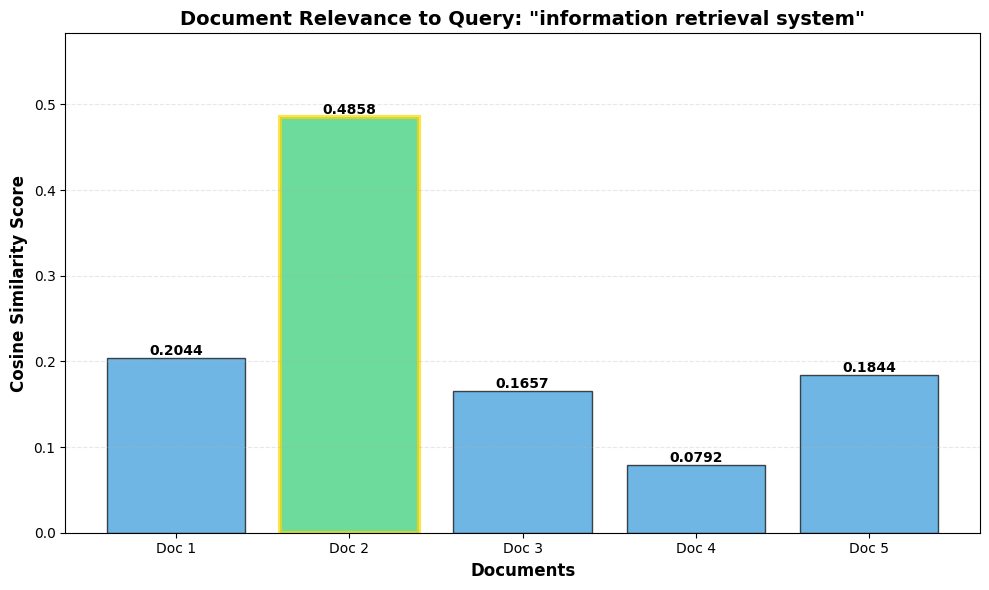


🏆 Doc 2 (highlighted in green with gold border) has the highest relevance score!


In [5]:
import matplotlib.pyplot as plt

# Create a bar chart of similarity scores
fig, ax = plt.subplots(figsize=(10, 6))

doc_labels = [f'Doc {i+1}' for i in range(len(documents))]
colors = ['#2ecc71' if i == rankings[0][0] else '#3498db' for i in range(len(documents))]

bars = ax.bar(doc_labels, similarity_scores, color=colors, alpha=0.7, edgecolor='black')

# Highlight the top document
bars[rankings[0][0]].set_edgecolor('gold')
bars[rankings[0][0]].set_linewidth(3)

ax.set_xlabel('Documents', fontsize=12, fontweight='bold')
ax.set_ylabel('Cosine Similarity Score', fontsize=12, fontweight='bold')
ax.set_title(f'Document Relevance to Query: "{query[0]}"', fontsize=14, fontweight='bold')
ax.set_ylim(0, max(similarity_scores) * 1.2)

# Add value labels on bars
for i, (bar, score) in enumerate(zip(bars, similarity_scores)):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{score:.4f}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print(f"\n🏆 Doc {rankings[0][0] + 1} (highlighted in green with gold border) has the highest relevance score!")

C:\Users\seakl\AppData\Local\Temp\ipykernel_6192\788331810.py:7: DeprecationWarning: Passing transport options in the API method is deprecated. Use 'Elasticsearch.options()' instead.
  es.indices.create(index="docs", ignore=400)


In [1]:
from elasticsearch import Elasticsearch

# Connect to Elasticsearch (HTTP mode)
es = Elasticsearch("http://localhost:9200")

# Test connection
if not es.ping():
    raise Exception("Connection failed.")
print("Connected to Elasticsearch!\n")

# --- Step 1: Index sample documents ---
docs = [
    {"title": "Machine Learning Basics", "content": "Introduction to ML concepts."},
    {"title": "Deep Learning Guide", "content": "Neural networks and more."},
    {"title": "Python Programming", "content": "Python for data analysis."},
    {"title": "Information Retrieval", "content": "Elasticsearch and ad-hoc search."},
    {"title": "Data Science Overview", "content": "Statistics and ML applications."}
]

index_name = "books"

# Index documents
for i, doc in enumerate(docs, 1):
    es.index(index=index_name, id=i, document=doc)
print("Documents indexed.\n")

# --- Step 2: Perform ad-hoc search ---
query_text = "neural networks"
query = {
    "query": {
        "match": {
            "content": query_text
        }
    }
}

res = es.search(index=index_name, body=query)

# --- Step 3: Display results with ranking scores ---
print(f"Search results for: '{query_text}'\n")
for hit in res['hits']['hits']:
    print(f"Score: {hit['_score']:.4f}, Title: {hit['_source']['title']}")


Connected to Elasticsearch!

Documents indexed.

Search results for: 'neural networks'

